**Air Quality India (2015-2020) classification project**

**1) The dataset is a collection of pollutant readings across cities in India recorded between 2015 and 2020. The data consists of 26 cities in India, and is split into the following categories: -**

  
	City - 26 cities               
	Date - daily readings between 2015 and 2020
	PM2.5 - Particulate Matter 2.5-micrometer in ug / m3
	PM10 - Particulate Matter 10-micrometer in ug / m3
	NO - Nitric Oxide in ug / m3
	NO2 - Nitric Dioxide in ug / m3
	NOx - Any Nitric x-oxide in ppb
	NH3 - Ammonia in ug / m3
	CO - Carbon Monoxide in mg / m3
	SO2 - Sulphur Dioxide in ug / m3
	O3 - Ozone in ug / m3
	Benzene - Benzene in ug / m3
	Toluene - Toluene in ug / m3
	Xylene - Xylene in ug / m3
	AQI - Air Quality Index
	AQI Bucket - Air Quality Index Bucket (ranging from 'very poor' to 'good')**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
from google.colab import files
upload = files.upload()

Saving city_hour (1).csv to city_hour (1).csv


In [3]:
import io
city_hour=pd.read_csv(io.BytesIO(upload['city_hour (1).csv']))

**Data Description**

Describe the dataset with head,shape,discribe,info.


In [4]:
city_hour.head(10)

,Unnamed: 0,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,339151,Guwahati,2019-04-27 20:00:00,47.79,67.19,1.09,9.96,12.35,11.10,0.62,17.18,55.76,0.00,NaN,NaN,104.0,Moderate
1,301654,Gurugram,2016-05-30 13:00:00,6.48,NaN,2.00,6.01,5.00,NaN,0.70,2.22,20.31,NaN,NaN,NaN,44.0,Good
2,227514,Chennai,2019-07-15 20:00:00,63.40,NaN,6.63,19.68,26.31,44.59,1.35,5.03,48.70,0.00,0.00,NaN,124.0,Moderate
3,127882,Bengaluru,2017-11-05 22:00:00,90.70,11.47,4.09,19.50,12.46,26.70,0.39,2.96,4.18,0.00,0.00,NaN,52.0,Satisfactory
4,374209,Hyderabad,2017-10-31 03:00:00,73.33,159.31,13.55,44.43,34.65,17.02,0.71,14.51,88.88,7.40,57.14,6.88,NaN,NaN
5,516150,Lucknow,2019-08-14 17:00:00,21.27,NaN,5.08,19.61,10.85,11.10,0.77,2.84,24.00,0.68,2.95,NaN,92.0,Satisfactory
6,123470,Bengaluru,2017-05-06 02:00:00,42.79,75.13,4.89,33.13,0.00,NaN,0.38,4.54,NaN,3.00,2.25,NaN,94.0,Satisfactory
7,572627,Patna,2015-06-25 12:00:00,NaN,NaN,8.80,9.06,17.87,NaN,0.58,1.96,8.22,0.28,1.82,0.50,NaN,NaN
8,618853,Shillong,2019-11-29 04:00:00,NaN,0.27,0.97,2.95,1.25,3.04,0.07,6.78,43.70,0.18,0.00,NaN,49.0,Good
9,446664,Jorapokhar,2019-11-08 16:00:00,59.55,96.83,7.83,8.62,NaN,6.36,NaN,8.90,92.28,NaN,NaN,NaN,211.0,Poor


In [5]:
city_hour.shape

(50000, 17)

In [39]:
city_hour.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,year,month,day,AQI_Bucket
count,16309.000000,16309.000000,16309.000000,16309.00000,16309.000000,16309.000000,16309.000000,16309.000000,16309.000000,16309.000000,16309.000000,16309.000000,16309.000000,16309.000000,16309.000000
mean,61.143052,124.883407,18.647064,33.23681,36.247232,23.403284,1.035170,11.340077,39.034909,3.869928,9.627112,2018.275492,6.244650,15.844013,2.119566
std,62.157706,104.370977,35.088126,25.74532,40.342886,18.970696,1.530107,10.756015,29.648057,19.450042,22.450513,1.412722,3.551522,8.829835,1.340554
min,0.090000,0.140000,0.010000,0.02000,0.000000,0.050000,0.000000,0.030000,0.020000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000
25%,25.150000,57.500000,3.720000,15.41000,13.890000,11.150000,0.470000,5.580000,17.500000,0.440000,1.400000,2017.000000,3.000000,8.000000,1.000000
50%,43.710000,95.350000,7.870000,26.68000,24.330000,18.040000,0.730000,8.640000,30.900000,1.500000,4.380000,2019.000000,6.000000,16.000000,2.000000
75%,72.270000,153.000000,16.510000,43.38000,42.060000,30.500000,1.090000,13.300000,53.720000,3.580000,10.890000,2019.000000,10.000000,23.000000,3.000000
max,754.980000,999.990000,497.400000,251.22000,493.130000,302.280000,46.000000,160.770000,361.330000,491.510000,491.510000,2020.000000,12.000000,31.000000,5.000000


In [7]:
city_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50000 non-null  int64  
 1   City        50000 non-null  object 
 2   Datetime    50000 non-null  object 
 3   PM2.5       39908 non-null  float64
 4   PM10        29177 non-null  float64
 5   NO          41812 non-null  float64
 6   NO2         41829 non-null  float64
 7   NOx         41344 non-null  float64
 8   NH3         30862 non-null  float64
 9   CO          43864 non-null  float64
 10  SO2         40890 non-null  float64
 11  O3          40992 non-null  float64
 12  Benzene     38380 non-null  float64
 13  Toluene     34377 non-null  float64
 14  Xylene      17748 non-null  float64
 15  AQI         40998 non-null  float64
 16  AQI_Bucket  40998 non-null  object 
dtypes: float64(13), int64(1), object(3)
memory usage: 6.5+ MB


**Data cleaning**

In [8]:
city_hour.isnull().sum()

Unnamed: 0        0
City              0
Datetime          0
PM2.5         10092
PM10          20823
NO             8188
NO2            8171
NOx            8656
NH3           19138
CO             6136
SO2            9110
O3             9008
Benzene       11620
Toluene       15623
Xylene        32252
AQI            9002
AQI_Bucket     9002
dtype: int64

In [9]:
city_hour.drop(['Xylene','AQI','Unnamed: 0'],axis=1,inplace=True)

In [10]:
city_hour.isnull().sum()

City              0
Datetime          0
PM2.5         10092
PM10          20823
NO             8188
NO2            8171
NOx            8656
NH3           19138
CO             6136
SO2            9110
O3             9008
Benzene       11620
Toluene       15623
AQI_Bucket     9002
dtype: int64

In [11]:
city_hour = city_hour.dropna()
print(city_hour)

                City             Datetime   PM2.5    PM10      NO    NO2  \
3          Bengaluru  2017-11-05 22:00:00   90.70   11.47    4.09  19.50   
13          Amritsar  2019-05-07 03:00:00  100.34  200.13   11.19  17.26   
14         Bengaluru  2016-11-30 03:00:00   64.55  170.91    2.20  18.66   
16         Amaravati  2018-07-09 02:00:00   14.00   29.25    1.23   5.10   
17            Jaipur  2019-04-13 23:00:00   63.31  173.59   11.11  28.08   
...              ...                  ...     ...     ...     ...    ...   
49969          Delhi  2019-10-31 22:00:00  439.95  677.92  146.80  90.21   
49970      Amaravati  2019-12-02 11:00:00   57.75   90.25    3.05  11.35   
49978      Amaravati  2020-01-08 11:00:00   61.00   88.00    2.92  11.78   
49987  Visakhapatnam  2018-04-27 11:00:00   16.00   57.75    5.43  23.60   
49992      Hyderabad  2019-08-26 04:00:00   11.60   38.75    1.85  20.85   

          NOx    NH3    CO     SO2     O3  Benzene  Toluene    AQI_Bucket  
3       12.

In [12]:
city_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16309 entries, 3 to 49992
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        16309 non-null  object 
 1   Datetime    16309 non-null  object 
 2   PM2.5       16309 non-null  float64
 3   PM10        16309 non-null  float64
 4   NO          16309 non-null  float64
 5   NO2         16309 non-null  float64
 6   NOx         16309 non-null  float64
 7   NH3         16309 non-null  float64
 8   CO          16309 non-null  float64
 9   SO2         16309 non-null  float64
 10  O3          16309 non-null  float64
 11  Benzene     16309 non-null  float64
 12  Toluene     16309 non-null  float64
 13  AQI_Bucket  16309 non-null  object 
dtypes: float64(11), object(3)
memory usage: 1.9+ MB


In [13]:
city_hour['date']=pd.to_datetime(city_hour['Datetime']).dt.date
city_hour['time']=pd.to_datetime(city_hour['Datetime']).dt.time

<ipython-input-13-59880cf6f431>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hour['date']=pd.to_datetime(city_hour['Datetime']).dt.date
<ipython-input-13-59880cf6f431>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hour['time']=pd.to_datetime(city_hour['Datetime']).dt.time


In [14]:
city_hour.head(5)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket,date,time
3,Bengaluru,2017-11-05 22:00:00,90.70,11.47,4.09,19.50,12.46,26.70,0.39,2.96,4.18,0.00,0.00,Satisfactory,2017-11-05,22:00:00
13,Amritsar,2019-05-07 03:00:00,100.34,200.13,11.19,17.26,28.45,18.74,1.13,142.91,16.70,13.82,2.60,Moderate,2019-05-07,03:00:00
14,Bengaluru,2016-11-30 03:00:00,64.55,170.91,2.20,18.66,0.00,25.96,0.60,4.34,7.43,15.11,6.71,Moderate,2016-11-30,03:00:00
16,Amaravati,2018-07-09 02:00:00,14.00,29.25,1.23,5.10,3.73,10.15,0.41,5.20,50.45,0.30,0.20,Satisfactory,2018-07-09,02:00:00
17,Jaipur,2019-04-13 23:00:00,63.31,173.59,11.11,28.08,31.80,21.92,0.66,21.71,65.32,0.84,4.48,Moderate,2019-04-13,23:00:00


In [15]:
city_hour=city_hour.astype({'date':str})
city_hour[['year','month','day']]=city_hour.date.str.split('-',expand=True)

In [16]:
city_hour=city_hour.astype({'year':'int32','month':'int32','day':'int32'})

<Axes: title={'center': 'Distribution of AQI_Bucket 2015-2020'}, xlabel='AQI_Bucket', ylabel='count'>

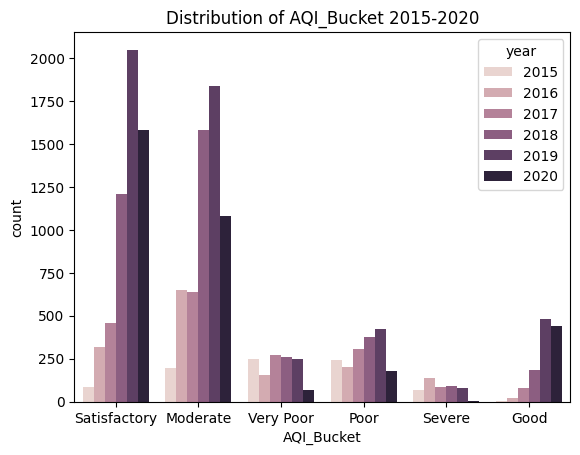

In [17]:
plt.title('Distribution of AQI_Bucket 2015-2020')
sns.countplot(x='AQI_Bucket' ,data=city_hour, hue='year')

In [18]:
city_hour.drop(['Datetime','City','date','time'],axis=1,inplace=True)

In [19]:
city_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16309 entries, 3 to 49992
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       16309 non-null  float64
 1   PM10        16309 non-null  float64
 2   NO          16309 non-null  float64
 3   NO2         16309 non-null  float64
 4   NOx         16309 non-null  float64
 5   NH3         16309 non-null  float64
 6   CO          16309 non-null  float64
 7   SO2         16309 non-null  float64
 8   O3          16309 non-null  float64
 9   Benzene     16309 non-null  float64
 10  Toluene     16309 non-null  float64
 11  AQI_Bucket  16309 non-null  object 
 12  year        16309 non-null  int32  
 13  month       16309 non-null  int32  
 14  day         16309 non-null  int32  
dtypes: float64(11), int32(3), object(1)
memory usage: 1.8+ MB


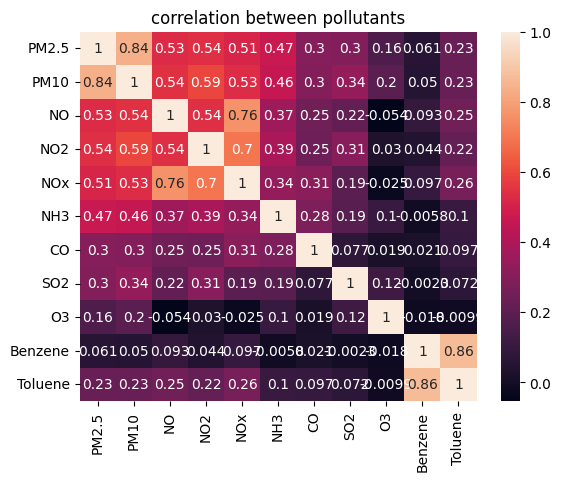

In [20]:
correlation =city_hour[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene']].corr()
sns.heatmap(correlation,annot=True)
plt.title('correlation between pollutants')
plt.show()

In [21]:
city_hour= city_hour.reindex(['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','year','month','day','AQI_Bucket'], axis=1)

In [22]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
city_hour['AQI_Bucket']=label_encoder.fit_transform(city_hour['AQI_Bucket'])

In [23]:
X = city_hour.iloc[:,0:14].values
Y = city_hour['AQI_Bucket'].values
print(type(Y))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/3,random_state = 0)

In [25]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('Y_train shape:',Y_train.shape)
print('Y_test shape:',Y_test.shape)

X_train shape: (10872, 14)
X_test shape: (5437, 14)
Y_train shape: (10872,)
Y_test shape: (5437,)


In [26]:
#feature scaling
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(X_train,Y_train)
y_pred = regressor.predict(X_test)
print(y_pred)
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)

#accuracy score of the model
print('Accuracy score :',accuracy_score(Y_test,y_pred))

[3 3 3 ... 3 1 1]
[[ 234    3    0  196    0    0]
 [   4 1597   83  324    1   13]
 [   0  236  238    6    6   89]
 [  84  335    2 1425    0    0]
 [   0   11   11    2   74   67]
 [   0   33   82    1   23  257]]
Accuracy score : 0.7035129667095825


<Axes: title={'center': 'Confusion_matrix'}>

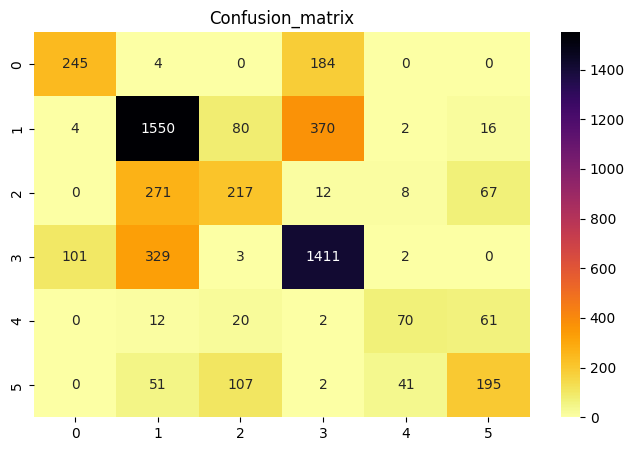

In [38]:
#plotting the confusion matrix
plt.figure(figsize=(8,5))
plt.title('Confusion_matrix')
sns.heatmap(cm,annot=True,fmt='d',cmap='inferno_r')


**conclusion -**
 the air quality classification project proved to be an insightful exploration into the effectiveness of various machine learning algorithms in discerning and predicting air quality. Through rigorous testing and experimentation with algorithms such as Naive Bayes, Support Vector Machines (SVM), k-Nearest Neighbors (KNN), Decision Trees, and Random Forest, it became evident that Random Forest emerged as the most adept model, consistently yielding superior accuracy.

Random Forest's success can be attributed to its ability to mitigate overfitting, handle large datasets efficiently, and provide robust predictions by aggregating multiple decision trees. Its ensemble approach, which combines the predictions of several base estimators, proved particularly effective in capturing the complexities and nuances of air quality data.

While other algorithms showcased respectable performance, Random Forest consistently outperformed them, underscoring its suitability for this specific task. Moreover, its ease of implementation and parameter tuning further enhance its appeal for real-world applications.